In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:24pt;}
div.text_cell_render.rendered_html{font-size:20pt;}
div.text_cell_render li, div.text_cell_render p, code{font-size:22pt; line-height:40px;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:24pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:24pt;padding:5px;}
table.dataframe{font-size:24px;}
</style>
"""))

<font size="5" color="red"><b>ch2. 군집분석</b></font>
# 1절. 군집모델(클러스터링)
- 클러스터(cluster) : 독립변수의 특성이 유사한 데이터의 그룹
- 클러스터링(clustering) : 주어진 데이터를 여러 개의 클러스터로 구분하는 것
1) 중심 기반 클러스터링(K-Means) : https://commons.wikimedia.org/wiki/File:KMeans-Gaussian-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/e/e5/KMeans-Gaussian-data.svg"
style="display: block; margin-left: 0; width: 20%;">
2) 연결기반 클러스터링(DBSCAN) : https://commons.wikimedia.org/wiki/File:DBSCAN-density-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/0/05/DBSCAN-density-data.svg"
width="300"
style="display: block; margin-left: 0; width: 20%;">
3) 밀도기반 클러스터링(DBSCAN의 변형으로 OPTICS) :
https://commons.wikimedia.org/wiki/File:OPTICS-Gaussian-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/8/8a/OPTICS-Gaussian-data.svg"
width="300"
style="display: block; margin-left: 0; width: 20%;">

# 2절 K-Means 클러스터링
- 가장 단순하고 빠른 클러스터링 알고리즘
- 중심점을 찾아가는 알고리즘
- 세부 알고리즘 교안 6page

In [14]:
# 분류를 위한 가상의 데이터 생성
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=20, # 데이터 갯수
                          n_features=2,  # 독립변수 개수(기본값 20)
                          n_informative=2, # 타겟변수에 영향을 미치는 독립변수 갯수
                          n_redundant=0,   # 타겟변수에 영향을 미치지 않는 독립변수 갯수
                          n_clusters_per_class=1, # 각 타겟변수 그룹별 서브그룹이 없음
                          n_classes=2, # 타겟변수의 그룹수 
                          random_state=123)
import numpy as np
print(X.shape, y.shape)
np.c_[X, y][:3]

(20, 2) (20,)


array([[ 1.03859554,  2.51175389,  0.        ],
       [ 1.00271366,  1.93521549,  0.        ],
       [-1.6881048 ,  0.02599427,  1.        ]])

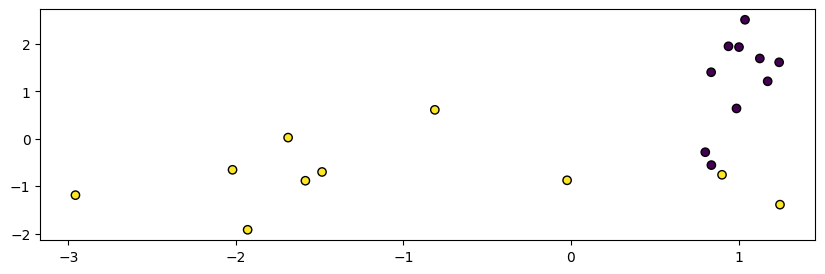

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.scatter(x = X[:, 0], y=X[:,1], c=y, edgecolors='k')
plt.show()

In [29]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, # 군의 갯수
              init='k-means++', # 초기 중심점을 서로 멀리. random(초기중심점랜덤)
              n_init=10,  # 각 다른 초기값으로 10번 실행해 보고 가장 좋은 모델 선택
              max_iter=300) # 각 실행에서 300번 미만으로 중심점을 옮김
model.fit(X)

KMeans(n_clusters=2, n_init=10)

In [35]:
centers = model.cluster_centers_ # 각 그룹의 중심점
print('model.labels :', model.labels_)
pred = model.predict(X)
print('  예 측 값   :', pred)
print('  실 제 값   :', y)

model.labels : [0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0]
  예 측 값   : [0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0]
  실 제 값   : [0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0]


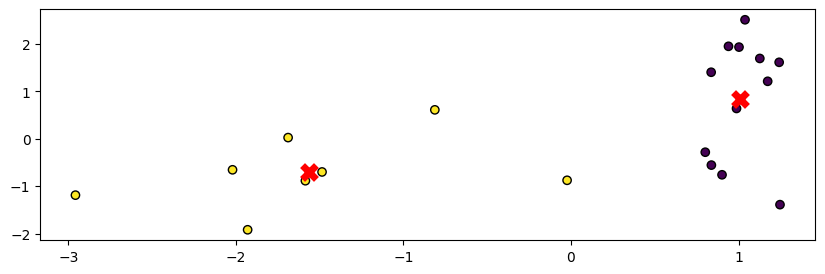

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.scatter(x = X[:, 0], y=X[:,1], c=pred, edgecolors='k')
plt.scatter(x = centers[:, 0], y=centers[:, 1], c='r', marker='x', s=100, lw=5)
plt.show()

## cf Normalizer(스케일러) 적용

In [43]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
Xnor = scaler.fit_transform(X)
np.c_[X, Xnor][:3]

array([[ 1.03859554,  2.51175389,  0.3821159 ,  0.92411441],
       [ 1.00271366,  1.93521549,  0.46005267,  0.88789162],
       [-1.6881048 ,  0.02599427, -0.99988146,  0.01539667]])

In [44]:
model = KMeans(n_clusters=2,
              init='random',
              n_init='auto', #init가 k-means++이면 1, init가 random이면 10
              max_iter=300)
model.fit(Xnor)

KMeans(init='random', n_clusters=2, n_init='auto')

In [60]:
# 0그룹으로 분류된 Xnor
Xnor[model.labels_==0, 0] # x축
Xnor[model.labels_==0, 1] # y축

array([ 0.01539667, -0.99964925, -0.70515067,  0.60128094, -0.42571159,
       -0.37289833, -0.48721942, -0.30784666])

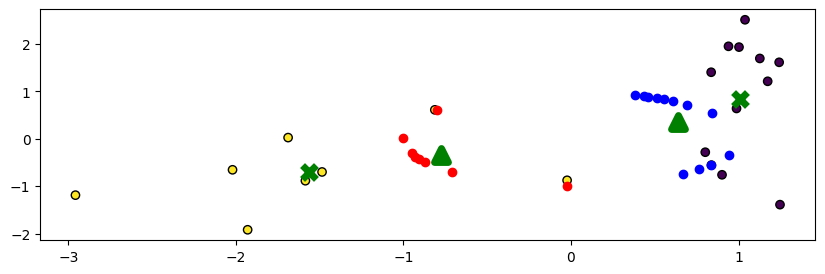

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.scatter(x = X[:, 0], y=X[:,1], c=pred, edgecolors='k')
plt.scatter(x = centers[:, 0], y=centers[:, 1], c='g', marker='x', s=100, lw=5)
plt.scatter(x = Xnor[model.labels_==0, 0],
            y = Xnor[model.labels_==0, 1], c='b')
plt.scatter(x = Xnor[model.labels_==1, 0],
            y = Xnor[model.labels_==1, 1], c='r')
plt.scatter(x = model.cluster_centers_[:, 0],
            y = model.cluster_centers_[:, 1], c='g', marker='^', s=100, lw=5)
plt.show()

In [58]:
model.cluster_centers_

array([[ 0.64128684,  0.34902823],
       [-0.77398837, -0.33522479]])

## K-Means 클러스터링의 한계점(13p)
- 군의 특성이 다를 경우
    * 군의 크기가 다른 경우
    * 군의 밀도가 다른 경우
    * 군이 비구형
- 이상치를 포함할 경우 : 이상치를 조정하거나 삭제한 후 클러스터링
### - 군의 크기가 다른 경우

In [69]:
# group0 : 평균-10, 표준편차2인 10행2열 배열
group0 = np.random.normal(loc=-10, scale=2, size=(10,2))
y = np.full(len(group0), 0)
group0 = np.c_[group0, y]
group0[:3]

array([[-11.3449209 , -10.71910632,   0.        ],
       [-11.62629256, -13.4525652 ,   0.        ],
       [ -9.64514772, -10.80356187,   0.        ]])

In [70]:
# group1 : 평균10, 표준편차2인 10행2열 배열
group1 = np.random.normal(loc=10, scale=2, size=(10,2))
y = np.full(len(group1), 1)
group1 = np.c_[group1, y]
group1[:3]

array([[ 7.66970032, 11.80165297,  1.        ],
       [10.93132488,  6.92751263,  1.        ],
       [12.97650439, 13.79177835,  1.        ]])

In [73]:
# group2 : 평균0, 표준편차5인 100행2열 배열
group2 = np.random.normal(loc=0, scale=5, size=(100,2))
y = np.full(len(group2), 2)
group2 = np.c_[group2, y]
group2[:2]

array([[ 1.91366215, -0.1712114 ,  2.        ],
       [ 5.48173423, -1.17107901,  2.        ]])

In [77]:
data = np.r_[group0, group1, group2]
data[::10], data.shape

(array([[-11.3449209 , -10.71910632,   0.        ],
        [  7.66970032,  11.80165297,   1.        ],
        [  1.91366215,  -0.1712114 ,   2.        ],
        [ -1.1130284 ,  -4.56539609,   2.        ],
        [  1.06740024,  -6.04286827,   2.        ],
        [ 10.05628341,  -0.22297713,   2.        ],
        [ -9.75902051,  -3.29945865,   2.        ],
        [ -7.75214673,   2.08659411,   2.        ],
        [  3.38230366,  -1.91004478,   2.        ],
        [ -0.45191004,   6.8379862 ,   2.        ],
        [ -4.66370455,  -6.31534175,   2.        ],
        [ -2.95701334,   5.62209592,   2.        ]]),
 (120, 3))

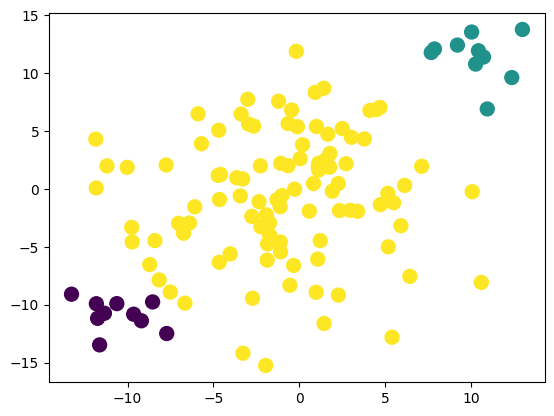

In [80]:
plt.scatter(x=data[:,0], y=data[:,1], c=data[:,2], s=100)

In [94]:
model = KMeans(n_clusters=3, init='k-means++', n_init='auto')
model.fit(data[:, :2])

KMeans(n_clusters=3, n_init='auto')

In [95]:
centers = model.cluster_centers_ # 중심점
centers

array([[-5.96444131, -8.2261225 ],
       [-0.51018107,  0.95174922],
       [ 7.49907856,  9.21791529]])

In [96]:
pred = model.predict(data[:, :2]) # 예측값
pred = model.labels_ # 모델이 클러스터링한 결과

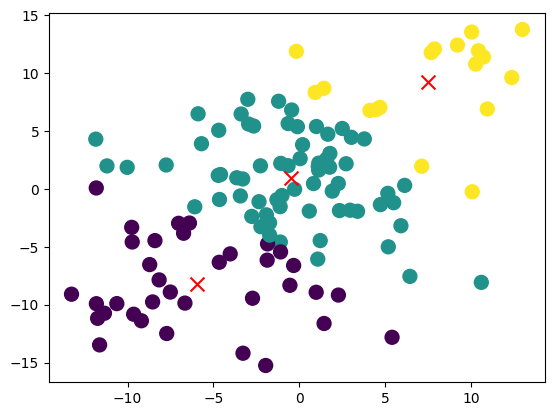

In [99]:
plt.scatter(x=data[:, 0], y=data[:, 1], c=pred, s=100)
plt.scatter(x=centers[:,0], y=centers[:,1], c='r', s=100, marker='x')

In [100]:
# 위의 단점을 보완하고자 6개 그룹으로 clustering
model = KMeans(n_clusters=6, n_init=10)
model.fit(data[:, :2])

KMeans(n_clusters=6, n_init=10)

In [101]:
centers = model.cluster_centers_
pred = model.labels_
pred

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0,
       5, 3, 2, 2, 3, 1, 2, 2, 5, 1, 5, 2, 1, 1, 0, 1, 5, 5, 5, 2, 5, 5,
       0, 2, 0, 2, 1, 1, 0, 5, 1, 2, 2, 5, 2, 0, 5, 2, 1, 1, 5, 2, 3, 2,
       5, 2, 5, 1, 1, 1, 1, 5, 5, 3, 2, 2, 2, 0, 0, 5, 5, 2, 2, 1, 0, 2,
       1, 2, 2, 0, 1, 0, 2, 5, 2, 2, 5, 5, 5, 0, 5, 2, 1, 5, 1, 2, 2, 0,
       2, 2, 3, 0, 2, 2, 3, 2, 5, 2])

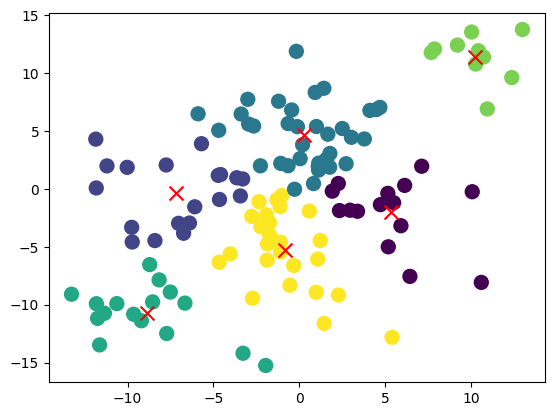

In [102]:
plt.scatter(x=data[:, 0], y=data[:, 1], c=pred, s=100)
plt.scatter(x=centers[:,0], y=centers[:,1], c='r', s=100, marker='x')

In [107]:
data[pred==0, 0] # 0번 그룹의 x축 데이터

array([ 1.91366215,  5.48173423,  6.12435282,  5.90689301,  4.7123406 ,
       10.05628341,  2.9493991 ,  6.42992004,  3.38230366,  2.33083213,
        5.17204943,  5.14467746,  2.26244546,  7.11491748, 10.58395511])

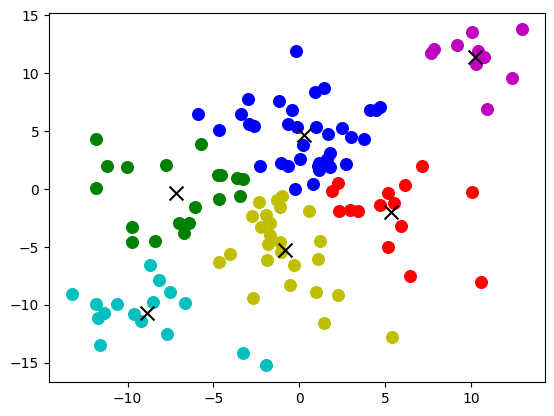

In [109]:
colors = ['r', 'g', 'b', 'c', 'm', 'y'] # 0,1,2,5 / 3 / 4

for i in range(len(colors)):
    plt.scatter(x = data[pred==i, 0],
                y = data[pred==i, 1], c=colors[i], s=70)
plt.scatter(x=centers[:,0], y=centers[:,1], c='k', s=100, marker='x')

# 3절 Hierarchical 클러스터링(계층적 군집분석)
- 계층적 분석(linkage) -> dendrogram -> fcluster를 이용해서 클러스터를 생성
    
    * 군끼리 묶으면서 최종적으로는 하나의 군집이 될 때까지 군을 묶는 클러스터링 알고리즘
    * 군집의 수를 미리 정해주지 않아도 됨
    * Dendrogram을 이용하여 다양한 군집 수 시각화

In [8]:
from seaborn import load_dataset
iris = load_dataset('iris')
iris.sample(1)

,sepal_length,sepal_width,petal_length,petal_width,species
60,5.0,2.0,3.5,1.0,versicolor


In [9]:
# 계층적 군집결과와 맞추기 위한 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['species'] = le.fit_transform(iris.species)
iris.loc[::50]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
50,7.0,3.2,4.7,1.4,1
100,6.3,3.3,6.0,2.5,2


In [12]:
from scipy.cluster.hierarchy import linkage
# method="single" : 가장 가까운 거리를 사용
# method="complete" : 가장 먼 거리를 이용
cluster_model = linkage(iris, method="complete")
cluster_model.shape

(149, 4)

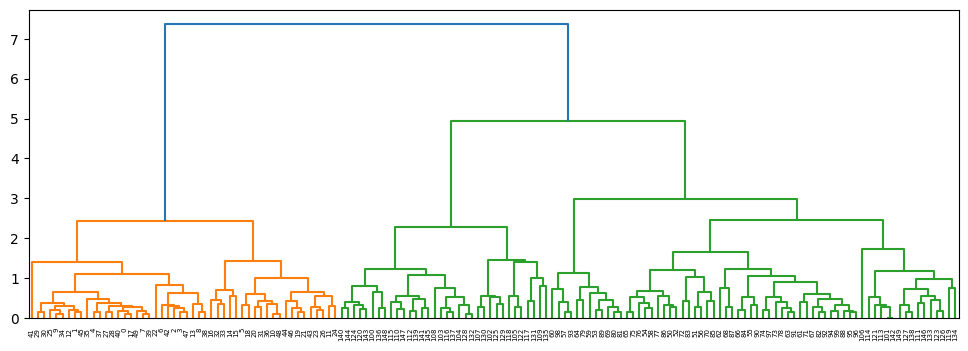

In [24]:
# dendrogram
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
dendrogram(cluster_model, labels=iris.index)
# 파일로 저장
plt.savefig('data/ch02_dendrogram.png', dpi=300)
plt.show()

In [27]:
# 클러서터링
from scipy.cluster.hierarchy import fcluster
fcluster(cluster_model, # linkage()로 만든 클러스터링 결과
        t=6, # 클러스터를 나누는 임계값(threshold)
        criterion='distance')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [30]:
pred = fcluster(cluster_model, 4, criterion='distance')
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [31]:
# pred에서 1은 0으로, 3은 1로, 2는 2로 변경
import numpy as np
np.choose([3, 3, 2, 1, 2], [0, 10, 20, 30]) # np.choose(인덱스, 값)

array([30, 30, 20, 10, 20])

In [35]:
# pred에서 1은 0으로, 3은 1로, 2는 2로 변경
adjusted_pred = np.choose(pred, [999, 0, 2, 1]) # 조정된 예측치(실제값:iris.species)
import pandas as pd
pd.crosstab(iris.species, adjusted_pred, rownames=['실제'], colnames=['예측'],
           margins=True) # 행과 열의 총계 추가

예측,0,1,2,All
실제,,,,
0,50,0,0,50
1,0,50,0,50
2,0,16,34,50
All,50,66,34,150


In [37]:
original_name = le.inverse_transform(iris.species)
pred_name = le.inverse_transform(adjusted_pred)
pd.crosstab(original_name, pred_name)

col_0,setosa,versicolor,virginica
row_0,,,
setosa,50,0,0
versicolor,0,50,0
virginica,0,16,34


<Axes: xlabel='petal_length', ylabel='petal_width'>

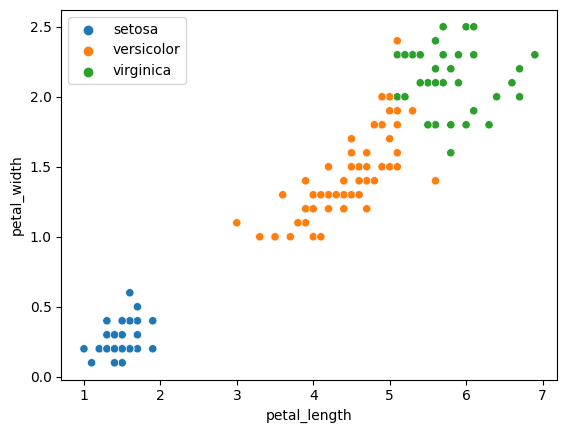

In [40]:
import seaborn as sns
sns.scatterplot(data=iris,
               x='petal_length', y='petal_width',
               hue=pred_name)